In [842]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset and Creating a Dataframe

In [843]:
uber=pd.read_csv("Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#### Inspecting dataframe

In [844]:
print(uber.shape)
print(uber.info())
uber.describe(include='all')

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 17:57,12/7/2016 21:53
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [845]:
uber.isnull().sum()  # Checking null values in columns

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Here the NULL values in Driver id and Drop timestamp are actually not NULL values. They represent No Cars Available and Cancelled requests status.

## Extracting date and time

In [846]:
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])  # converting the timestamp variables into datetime objects
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])

In [847]:
uber['Drop Date']=uber['Drop timestamp'].dt.date  # extracting drop date and inserting value into a new drop date column
uber['Drop Time']=uber['Drop timestamp'].dt.time  # extracting drop time and inserting value into a new drop time column

In [848]:
uber['Req Date']=uber['Request timestamp'].dt.date  # extracting request date and inserting value into a new column
uber['Req Time']=uber['Request timestamp'].dt.time  # extracting request time and inserting value into a new column
uber['Req Hour']=uber['Request timestamp'].dt.hour  # extracting request hour and inserting value into a new column
uber['Req Day'] = uber['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))  # extracting request day as name and inserting value into a new column

In [849]:
print('Unique Drop Dates:',uber['Drop Date'].nunique())     # checking the unique dates in the given data
print(uber['Drop Date'].unique() )

print('Unique Req Dates:',uber['Req Date'].nunique())
print(uber['Req Date'].unique())

Unique Drop Dates: 6
[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15) datetime.date(2016, 7, 16) NaT]
Unique Req Dates: 5
[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


In [850]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop Date,Drop Time,Req Date,Req Time,Req Hour,Req Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,13:00:00,2016-11-07,11:51:00,11,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,18:47:00,2016-11-07,17:57:00,17,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:58:00,2016-12-07,09:17:00,9,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,22:03:00,2016-12-07,21:08:00,21,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,09:25:47,2016-07-13,08:33:16,8,Wednesday


#### Creating a function to mention Time Slots

In [851]:
def timeslot(x):
    if x<4:                                 # if hour is less than 4, then Time Slot is noted as Late Night
        return 'Late Night'
    elif 4<=x<7:                            # if hour is between 4 and 7, then Time Slot is noted as Early Morning
        return 'Early Morning'
    elif 7<=x<12:                           # if hour is between 7 and 12, then Time Slot is noted as Morning
        return 'Morning'
    elif 12<=x<16:                          # if hour is between 12 and 16, then Time Slot is noted as Afternoon
        return 'Afternoon'
    elif 16<=x<18:                          # if hour is between 16 and 18, then Time Slot is noted as Evening
        return 'Evening'
    elif 18<=x<20:                          # if hour is between 18 and 20, then Time Slot is noted as Late Evening
        return 'Late Evenings'
    elif 20<=x<23:                          # if hour is between 20 and 23, then Time Slot is noted as Night
        return 'Night'
    else:                                   # if hour is 23, then Time Slot will be as Mid Night
        return 'Mid Night'

#### Calling function to apply and create Time Slot column

In [852]:
uber['Time Slot']=uber['Req Hour'].apply(lambda x: timeslot(x))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop Date,Drop Time,Req Date,Req Time,Req Hour,Req Day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,13:00:00,2016-11-07,11:51:00,11,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,18:47:00,2016-11-07,17:57:00,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:58:00,2016-12-07,09:17:00,9,Wednesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,22:03:00,2016-12-07,21:08:00,21,Wednesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,09:25:47,2016-07-13,08:33:16,8,Wednesday,Morning


## Analyzing the Dataframe

In [853]:
uber[(uber['Drop timestamp'].isnull())].groupby('Status').size()  # Check number of failed requests

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

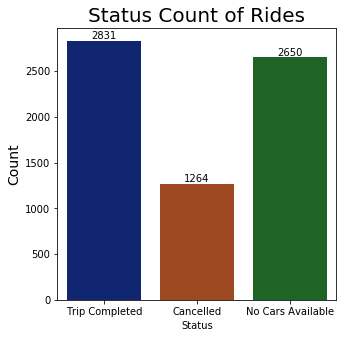

In [854]:
plt.figure(figsize=(5,5))
plt.title('Status Count of Rides',fontsize=20)
a=sns.countplot(x='Status',palette='dark', data=uber)   # countplot on basis of 'Status' coulmn
plt.ylabel('Count', fontsize=14)
for x in a.patches:            # for annotating the count
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

We can see that **Trips Completed** are less than compared to the failed requests(cancelled/no cars available). And **No Cars Available** requests are almost equal to the **Trips completed**.

## Frequency of Requests failed(Cancelled/No Cars Available)

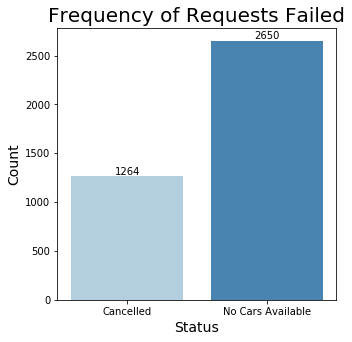

In [855]:
requests_failed=uber[uber.Status != "Trip Completed"]   # excluding Trips completed to get the failed requests
plt.figure(figsize=(5,5))
plt.title('Frequency of Requests Failed',fontsize=20)
a=sns.countplot(x='Status',palette='Blues', data=requests_failed)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

From the above plot we can see that **_No Cars Available_** are in double the number of **_Cancelled_** requests.

## Frequency of requests failed from Pickup Points

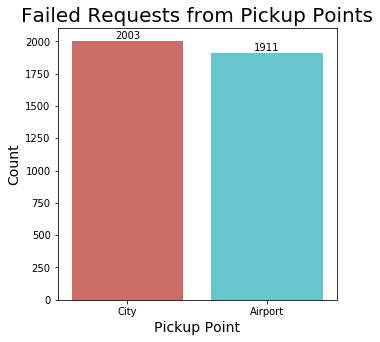

In [856]:
plt.figure(figsize=(5,5))
plt.title('Failed Requests from Pickup Points',fontsize=20)
a=sns.countplot(x='Pickup point',palette='hls', data=requests_failed)   # to plot on basis of the pickup points
plt.xlabel('Pickup Point', fontsize=14)
plt.ylabel('Count', fontsize=14)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

Requests failed from **_City_** pickup are just slightly high than from the **_Airport_** pickup. So, the requests from **_City_** are a bit more problematic than of those from **_Airport_**. 

## Status of Requests from Pickup Points

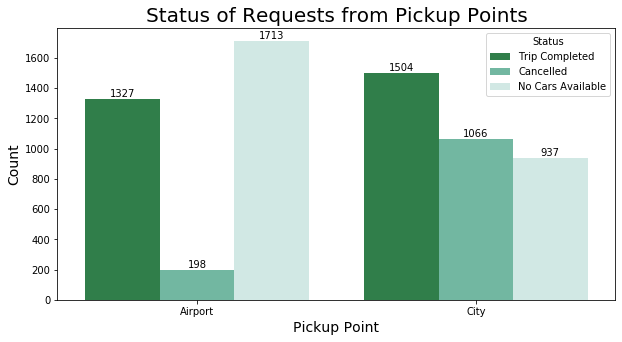

In [857]:
plt.figure(figsize=(10,5))
plt.title('Status of Requests from Pickup Points',fontsize=20)
a=sns.countplot(x='Pickup point',hue='Status',palette='BuGn_r', data=uber)
plt.xlabel('Pickup Point', fontsize=14)
plt.ylabel('Count', fontsize=14)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

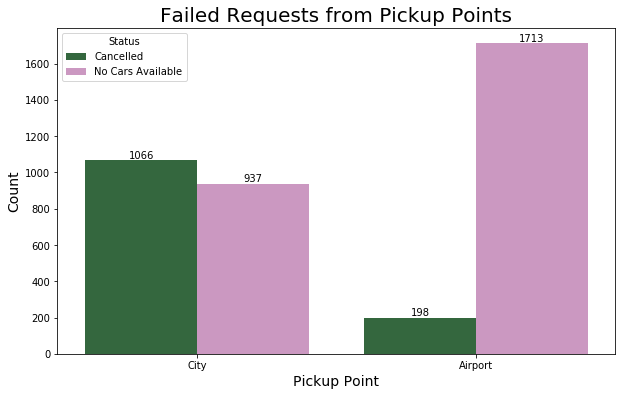

In [858]:
plt.figure(figsize=(10,6))
plt.title('Failed Requests from Pickup Points',fontsize=20)
a=sns.countplot(x='Pickup point',hue='Status',palette='cubehelix', data=requests_failed)
plt.xlabel('Pickup Point', fontsize=14)
plt.ylabel('Count', fontsize=14)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

From **Airport**, the **_cancelled_** requests are very low and **_No Cars Available_** requests are very high, Whereas from the **City** there is no much difference between **_Cancelled_** and **_No Cars Available_**, there is only a small difference.


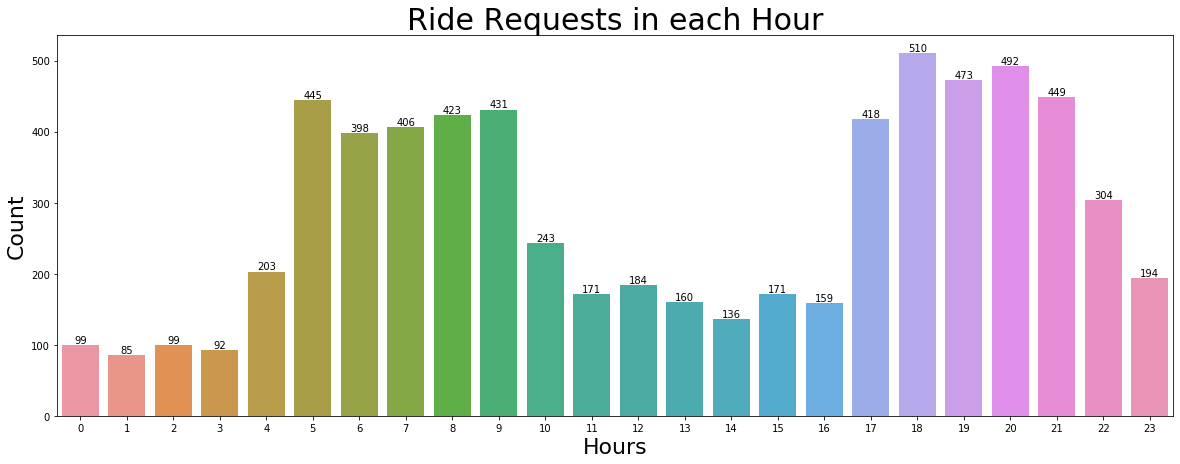

In [859]:
plt.figure(figsize=(20,7))
plt.title('Ride Requests in each Hour',fontsize=30)
a=sns.countplot(x='Req Hour', data=uber)
plt.xlabel('Hours', fontsize=22)
plt.ylabel('Count', fontsize=22)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

The requests are more in the **Morning**, **Late Evening** and **Night** hours.

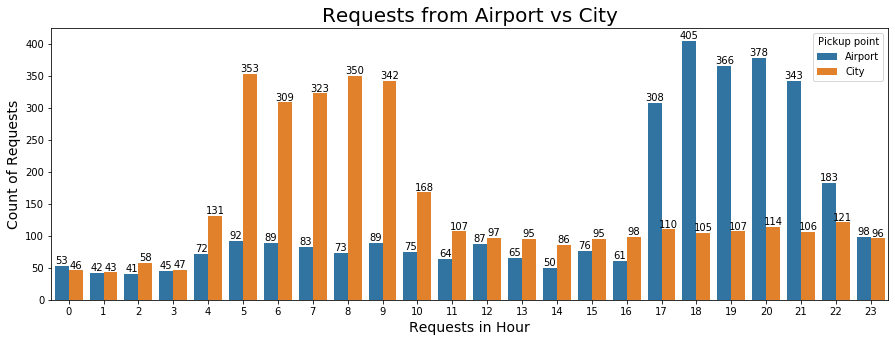

In [860]:
plt.figure(figsize=(15,5))
a=sns.countplot(x='Req Hour',hue='Pickup point',data=uber)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.title('Requests from Airport vs City', fontsize=20)
plt.xlabel('Requests in Hour', fontsize=14)
plt.ylabel('Count of Requests', fontsize=14)
plt.show()

Requests from **_City_** are more in **Morning** hours. Whereas requests from **_Airport_** are more from **Evening** to **Night** hours.

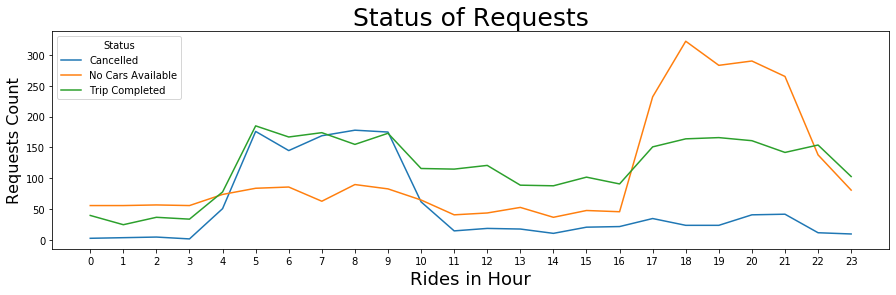

In [861]:
fig,ax=plt.subplots(figsize=(15,4))
plt.title('Status of Requests',fontsize=25)
uber.groupby(['Req Hour','Status']).count()['Request id'].unstack().plot(ax=ax)
plt.xticks(np.arange(0,24,step=1))
plt.xlabel('Rides in Hour', fontsize=18)
plt.ylabel('Requests Count', fontsize=16)
plt.show()

**_No Cars Available_** status are very high from **Evening** to **Night** hours. 

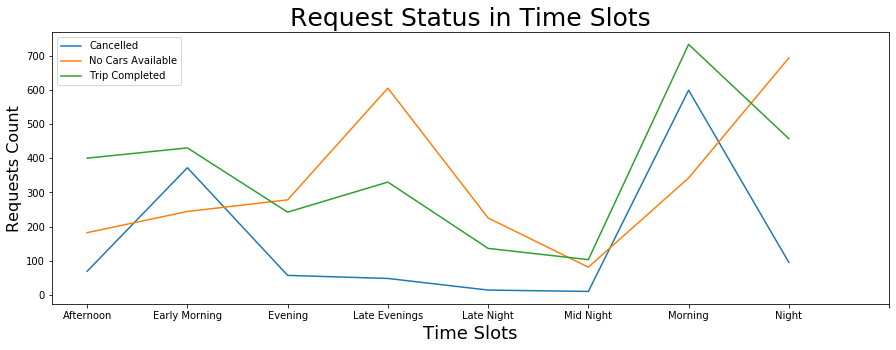

In [862]:
plt.figure(figsize=(15,5))
a=uber.groupby(['Time Slot','Status']).count()['Req Hour'].unstack()
plt.plot(a)
plt.legend(['Cancelled','No Cars Available','Trip Completed'])
plt.xticks(np.arange(0,9,step=1))
plt.title('Request Status in Time Slots',fontsize=25)
plt.xlabel('Time Slots', fontsize=18)
plt.ylabel('Requests Count', fontsize=16)
plt.show()

In [863]:
uber[(uber['Drop timestamp'].isnull())].groupby(['Status','Time Slot']).size()

Status             Time Slot    
Cancelled          Afternoon         69
                   Early Morning    372
                   Evening           57
                   Late Evenings     48
                   Late Night        14
                   Mid Night         10
                   Morning          599
                   Night             95
No Cars Available  Afternoon        182
                   Early Morning    244
                   Evening          278
                   Late Evenings    605
                   Late Night       225
                   Mid Night         81
                   Morning          342
                   Night            693
dtype: int64

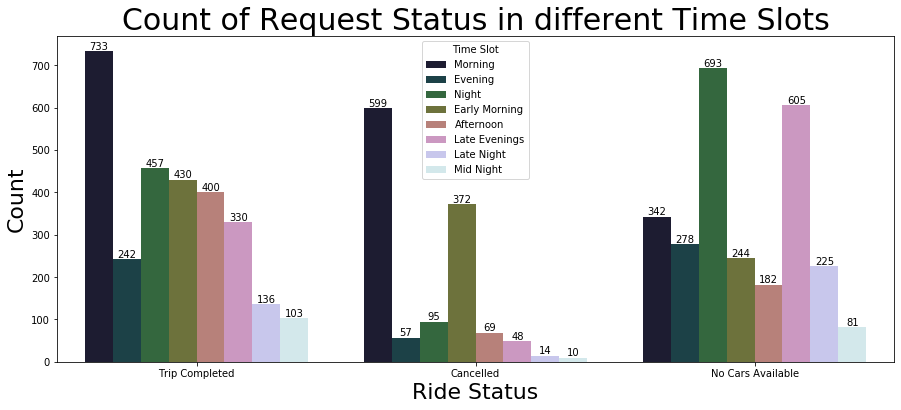

In [864]:
plt.figure(figsize=(15,6))
plt.title('Count of Request Status in different Time Slots',fontsize=30)
a=sns.countplot(x='Status',hue='Time Slot',palette='cubehelix', data=uber)
plt.xlabel('Ride Status', fontsize=22)
plt.ylabel('Count', fontsize=22)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

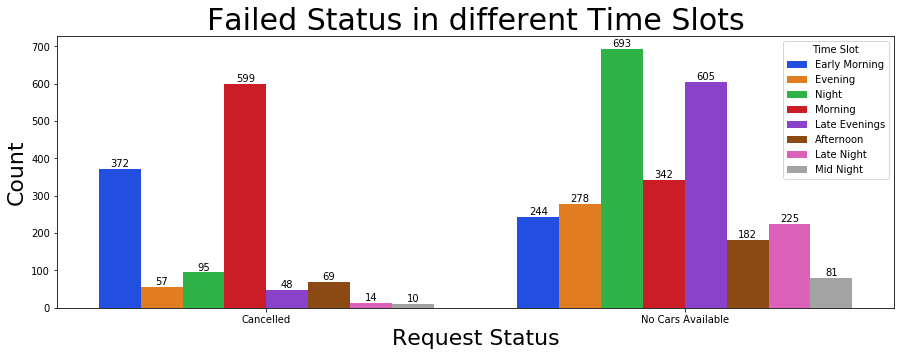

In [865]:
plt.figure(figsize=(15,5))
plt.title('Failed Status in different Time Slots',fontsize=30)
a=sns.countplot(x='Status',hue='Time Slot',palette='bright', data=requests_failed)
plt.xlabel('Request Status', fontsize=22)
plt.ylabel('Count', fontsize=22)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

Requests with **_Cancelled_** status are more in the **Morning** slots.
Requests with **_No Cars Available_** status are more in the **Night** slots.

In [866]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop Date,Drop Time,Req Date,Req Time,Req Hour,Req Day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,13:00:00,2016-11-07,11:51:00,11,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,18:47:00,2016-11-07,17:57:00,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:58:00,2016-12-07,09:17:00,9,Wednesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,22:03:00,2016-12-07,21:08:00,21,Wednesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,09:25:47,2016-07-13,08:33:16,8,Wednesday,Morning


## Finding Gap between Demand and Supply

In [867]:
uber['Demand'] = 1
uber['Supply'] = 0

In [868]:
uber.loc[(uber['Status'] == 'Trip Completed'),'Supply'] = 1
uber['Gap'] = uber['Demand'] - uber['Supply']  # as Gap is simply Demand - Supply

In [869]:
uber.loc[uber['Gap']==0,'Gap'] = 'Completed Ride'   # if Gap = 0, then Trip is completed
uber.loc[uber['Gap']==1,'Gap'] = 'Not Completed'    # if Gap = 1, then Trip is Not Completed

In [870]:
uber.groupby(['Gap']).size()

Gap
Completed Ride    2831
Not Completed     3914
dtype: int64

From this we can say that **Total Gap between Demand and Supply is 3914**.

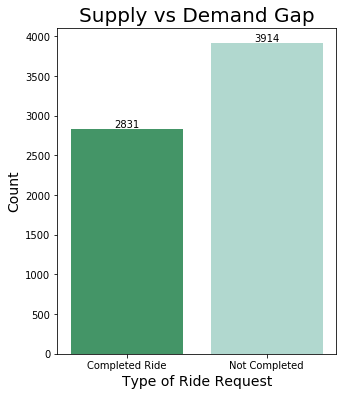

In [871]:
plt.figure(figsize=(5,6))
a=sns.countplot(x='Gap',palette='BuGn_r', data=uber)
plt.title('Supply vs Demand Gap',fontsize=20)
plt.xlabel('Type of Ride Request', fontsize=14)
plt.ylabel('Count', fontsize=14)
for x in a.patches:
    a.annotate(format(x.get_height()),(x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'bottom')
plt.show()

## Finding Gap in different Time Slots 

In [872]:
gap_table = pd.pivot_table(uber, index = 'Time Slot', columns = 'Status', values ='Request id', aggfunc = 'size')
gap_table   # created a pivot table to summarize on basis of Time Slots and Status

Status,Cancelled,No Cars Available,Trip Completed
Time Slot,,,
Afternoon,69,182,400
Early Morning,372,244,430
Evening,57,278,242
Late Evenings,48,605,330
Late Night,14,225,136
Mid Night,10,81,103
Morning,599,342,733
Night,95,693,457


In [873]:
def demand_gap(df):  # Gap is simply the difference between Total Demand - Total Supply
    return df['Trip Completed'] + df['Cancelled'] + df['No Cars Available'] - df['Trip Completed']

In [874]:
gap_table['Demand-Supply Gap'] = gap_table.apply(demand_gap, axis =1)
gap_table

Status,Cancelled,No Cars Available,Trip Completed,Demand-Supply Gap
Time Slot,,,,
Afternoon,69,182,400,251
Early Morning,372,244,430,616
Evening,57,278,242,335
Late Evenings,48,605,330,653
Late Night,14,225,136,239
Mid Night,10,81,103,91
Morning,599,342,733,941
Night,95,693,457,788


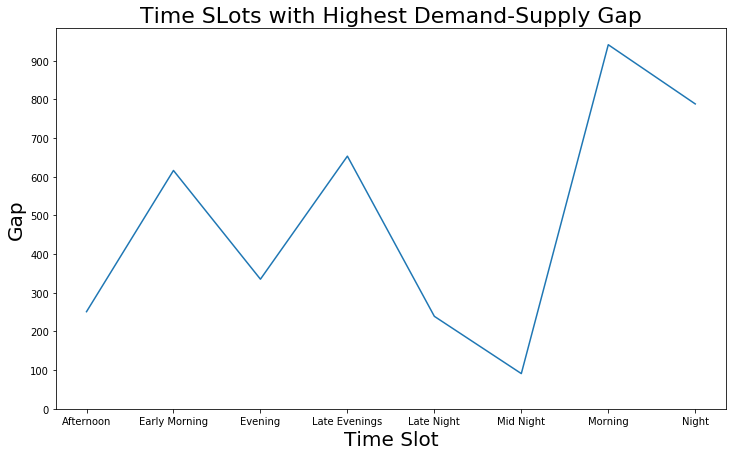

In [875]:
plt.figure(figsize=(12,7))
sns.lineplot(x=gap_table.index ,y='Demand-Supply Gap',data= gap_table)
plt.yticks(np.arange(0,1000,step=100))
plt.title('Time SLots with Highest Demand-Supply Gap',fontsize=22)
plt.xlabel('Time Slot',fontsize=20)
plt.ylabel('Gap',fontsize=20)
plt.show()

From this plot, we can conclude that the Gap between Demand and Supply is maximum in **_Morning_** time slot. And **_Night_** time slot takes the next place in having more gap.

## Gap in Time Slots for different Pickup Points 

In [876]:
gap_between_pickup_point = pd.pivot_table(uber, index = 'Time Slot', columns = ['Pickup point','Status'], values ='Request id', aggfunc = 'count')
gap_between_pickup_point    # created a pivot table to summarize data on basis of Time Slots, Pickup Points and Status

Pickup point    Airport                                       City  \
Status        Cancelled No Cars Available Trip Completed Cancelled   
Time Slot                                                            
Afternoon          36.0              55.0          187.0      33.0   
Early Morning      10.0              41.0          202.0     362.0   
Evening            33.0             224.0          112.0      24.0   
Late Evenings      30.0             577.0          164.0      18.0   
Late Night          NaN             114.0           67.0      14.0   
Mid Night           NaN              36.0           62.0      10.0   
Morning            29.0              37.0          318.0     570.0   
Night              60.0             629.0          215.0      35.0   

Pickup point                                    
Status        No Cars Available Trip Completed  
Time Slot                                       
Afternoon                 127.0          213.0  
Early Morning             203.0          228.0  
Evening                    54.0          130.0  
Late Evenings              28.0          166.0  
Late Night                111.0           69.0  
Mid Night                  45.0           41.0  
Morning                   305.0          415.0  
Night                      64.0          242.0

In [877]:
gap_between_pickup_point.fillna(0, inplace=True)   # As there are no Cancelled requests from Airport in few Time slots
                                                   # So, These Time Slots got filled with NULL, so replacing NULL with 0, for working on this.

In [878]:
gap_between_pickup_point['Airport Demand Gap']=gap_between_pickup_point['Airport'].apply(demand_gap, axis =1)  # applying the funcion to determine the Gap
gap_between_pickup_point['City Demand Gap']=gap_between_pickup_point['City'].apply(demand_gap, axis =1)        # and inserting these values in a new column

In [879]:
gap_between_pickup_point

Pickup point    Airport                                       City  \
Status        Cancelled No Cars Available Trip Completed Cancelled   
Time Slot                                                            
Afternoon          36.0              55.0          187.0      33.0   
Early Morning      10.0              41.0          202.0     362.0   
Evening            33.0             224.0          112.0      24.0   
Late Evenings      30.0             577.0          164.0      18.0   
Late Night          0.0             114.0           67.0      14.0   
Mid Night           0.0              36.0           62.0      10.0   
Morning            29.0              37.0          318.0     570.0   
Night              60.0             629.0          215.0      35.0   

Pickup point                                   Airport Demand Gap  \
Status        No Cars Available Trip Completed                      
Time Slot                                                           
Afternoon                 127.0          213.0               91.0   
Early Morning             203.0          228.0               51.0   
Evening                    54.0          130.0              257.0   
Late Evenings              28.0          166.0              607.0   
Late Night                111.0           69.0              114.0   
Mid Night                  45.0           41.0               36.0   
Morning                   305.0          415.0               66.0   
Night                      64.0          242.0              689.0   

Pickup point  City Demand Gap  
Status                         
Time Slot                      
Afternoon               160.0  
Early Morning           565.0  
Evening                  78.0  
Late Evenings            46.0  
Late Night              125.0  
Mid Night                55.0  
Morning                 875.0  
Night                    99.0

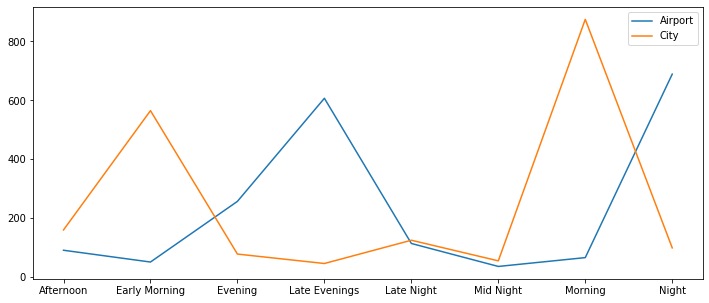

In [880]:
plt.figure(figsize=(12,5))
plt.plot(gap_between_pickup_point.index, gap_between_pickup_point['Airport Demand Gap'], label= 'Airport')
plt.plot(gap_between_pickup_point.index, gap_between_pickup_point['City Demand Gap'], label= 'City')
plt.legend()
plt.show()

Requests from **_Airport_** is having more gap during **Late Evenings** and **Night** time slots.
Requests from **_City_** is having more gap during **Early Morning** and **Morning** time slots.

#### Exporting the updated dataframes into excel for creating plot in Tableau to add in presentation

In [881]:
uber.to_excel('uber2.xlsx')

In [882]:
gap_table.to_excel('uber_gap.xlsx')

In [883]:
gap_between_pickup_point.to_excel('PickupPointGap.xlsx')